In [1]:
! ls data/
#Maher

BX-Police.csv     Sales.csv         budget-sample.csv
Iris.csv          Stocks.csv


# Using budget-sample.csv
* Plot a histogram of the base_salary.  Write one sentence about what this tells you about base salaries.
* Make a boxplot of base salaries, what does this tell you about base salaries?
* Make a boxplot of base salaries per (or by) work_location_borough, what does this tell you about the difference in working in each location?
* Make a plot visualizing the difference average base salaries based on agency_name.  Who would you want to work for based on this information?
<br><br>
* __Tell me something new, cool, and interesting about this data__


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

In [2]:
df = pd.read_csv('data/budget-sample.csv')
df.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2020,826,DEPT OF ENVIRONMENT PROTECTION,BROWN,TRACYANN,NaN,02/23/2004,QUEENS,COMMUNITY ASSISTANT,ACTIVE,37816.0,per Annum,2080.0,37235.48,11.00,206.04,1309.56
1,2020,56,POLICE DEPARTMENT,WONG,CHIWAI,NaN,07/08/2015,BROOKLYN,POLICE OFFICER,ACTIVE,63125.0,per Annum,2080.0,60758.85,343.13,10842.71,10325.31
2,2020,742,DEPT OF ED PEDAGOGICAL,FARRELL,TARA,E,09/09/1996,MANHATTAN,TEACHER SPECIAL EDUCATION,ACTIVE,121226.0,per Annum,0.0,118638.72,0.00,0.00,13069.69
3,2020,827,DEPARTMENT OF SANITATION,ATTANASIO,JOSEPH,NaN,10/18/1999,QUEENS,SANITATION WORKER,ACTIVE,77318.0,per Annum,2080.0,75833.83,455.50,28225.89,17602.11
4,2020,744,DEPT OF ED PARA PROFESSIONALS,MCNEIL,GLORIA,D,09/28/1989,MANHATTAN,ANNUAL ED PARA,ACTIVE,46333.0,per Annum,0.0,45344.28,0.00,0.00,5076.22


In [3]:
dup = df.duplicated().sum()
print(f'There are {dup} duplicate values in our dataframe')

There are 0 duplicate values in our dataframe


In [4]:
null_val = df.isnull().sum()
print(null_val)

fiscal_year                      0
payroll_number                   0
agency_name                      0
last_name                       18
first_name                      18
mid_init                      6706
agency_start_date                3
work_location_borough            0
title_description                1
leave_status_as_of_june_30       0
base_salary                      0
pay_basis                        0
regular_hours                    0
regular_gross_paid               0
ot_hours                         0
total_ot_paid                    0
total_other_pay                  0
dtype: int64


In [5]:
print(df.shape)


(16660, 17)


In [7]:
# * Remove any row that has a null value in it. 
df = df.dropna() 
print(df.shape)

(9954, 17)


1. Plot a histogram of the base_salary. Write one sentence about what this tells you about base salaries.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feff8079940>],
      dtype=object)

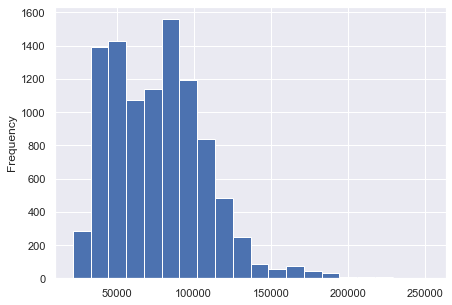

In [8]:
df['base_salary'].plot(kind='hist', bins=20, subplots=True, figsize=(7,5))

In [10]:
print("This histogram is skew right. The salary frequence is higher in the range 4000 to 9000. ")

This histogram is skew right. The salary frequence is higher in the range 4000 to 9000. 


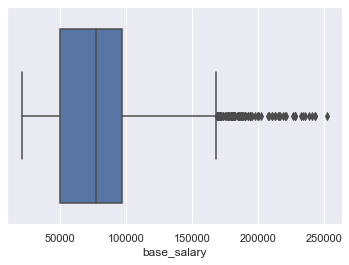

In [11]:
#Make a boxplot of base salaries, what does this tell you about base salaries?
ax = sns.boxplot(data = df, x = "base_salary")

In [12]:
#An outlier is an observation that lies at an abnormal distance from other values in a random sample from a population
print('This data has many salaries those lies on the high enough side of outliers');


This data has many salaries those lies on the high enough side of outliers


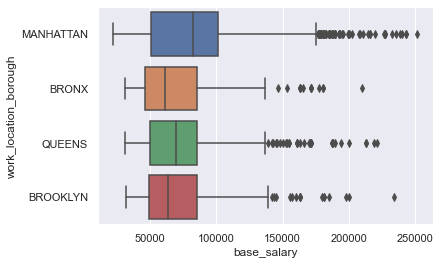

In [15]:
#Make a boxplot of base salaries per (or by) work_location_borough, what does this tell you about the difference in working in each location?
#gb = df.groupby('work_location_borough')
sns.boxplot(data = df, x = "base_salary", y = 'work_location_borough')

In [18]:
print("These graph demonstartaes that Bronx has the least amount of salaries those fall on the"+ 
      "high enough side of outlier, Manhattan has the highest frequency high end outlier outlier, "+
      "then queens, then Brooklyn")

These graph demonstartaes that Bronx has the least amount of salaries those fall on thehigh enough side of outlier, Manhattan has the highest frequency high end outlier outlier, then queens, then Brooklyn


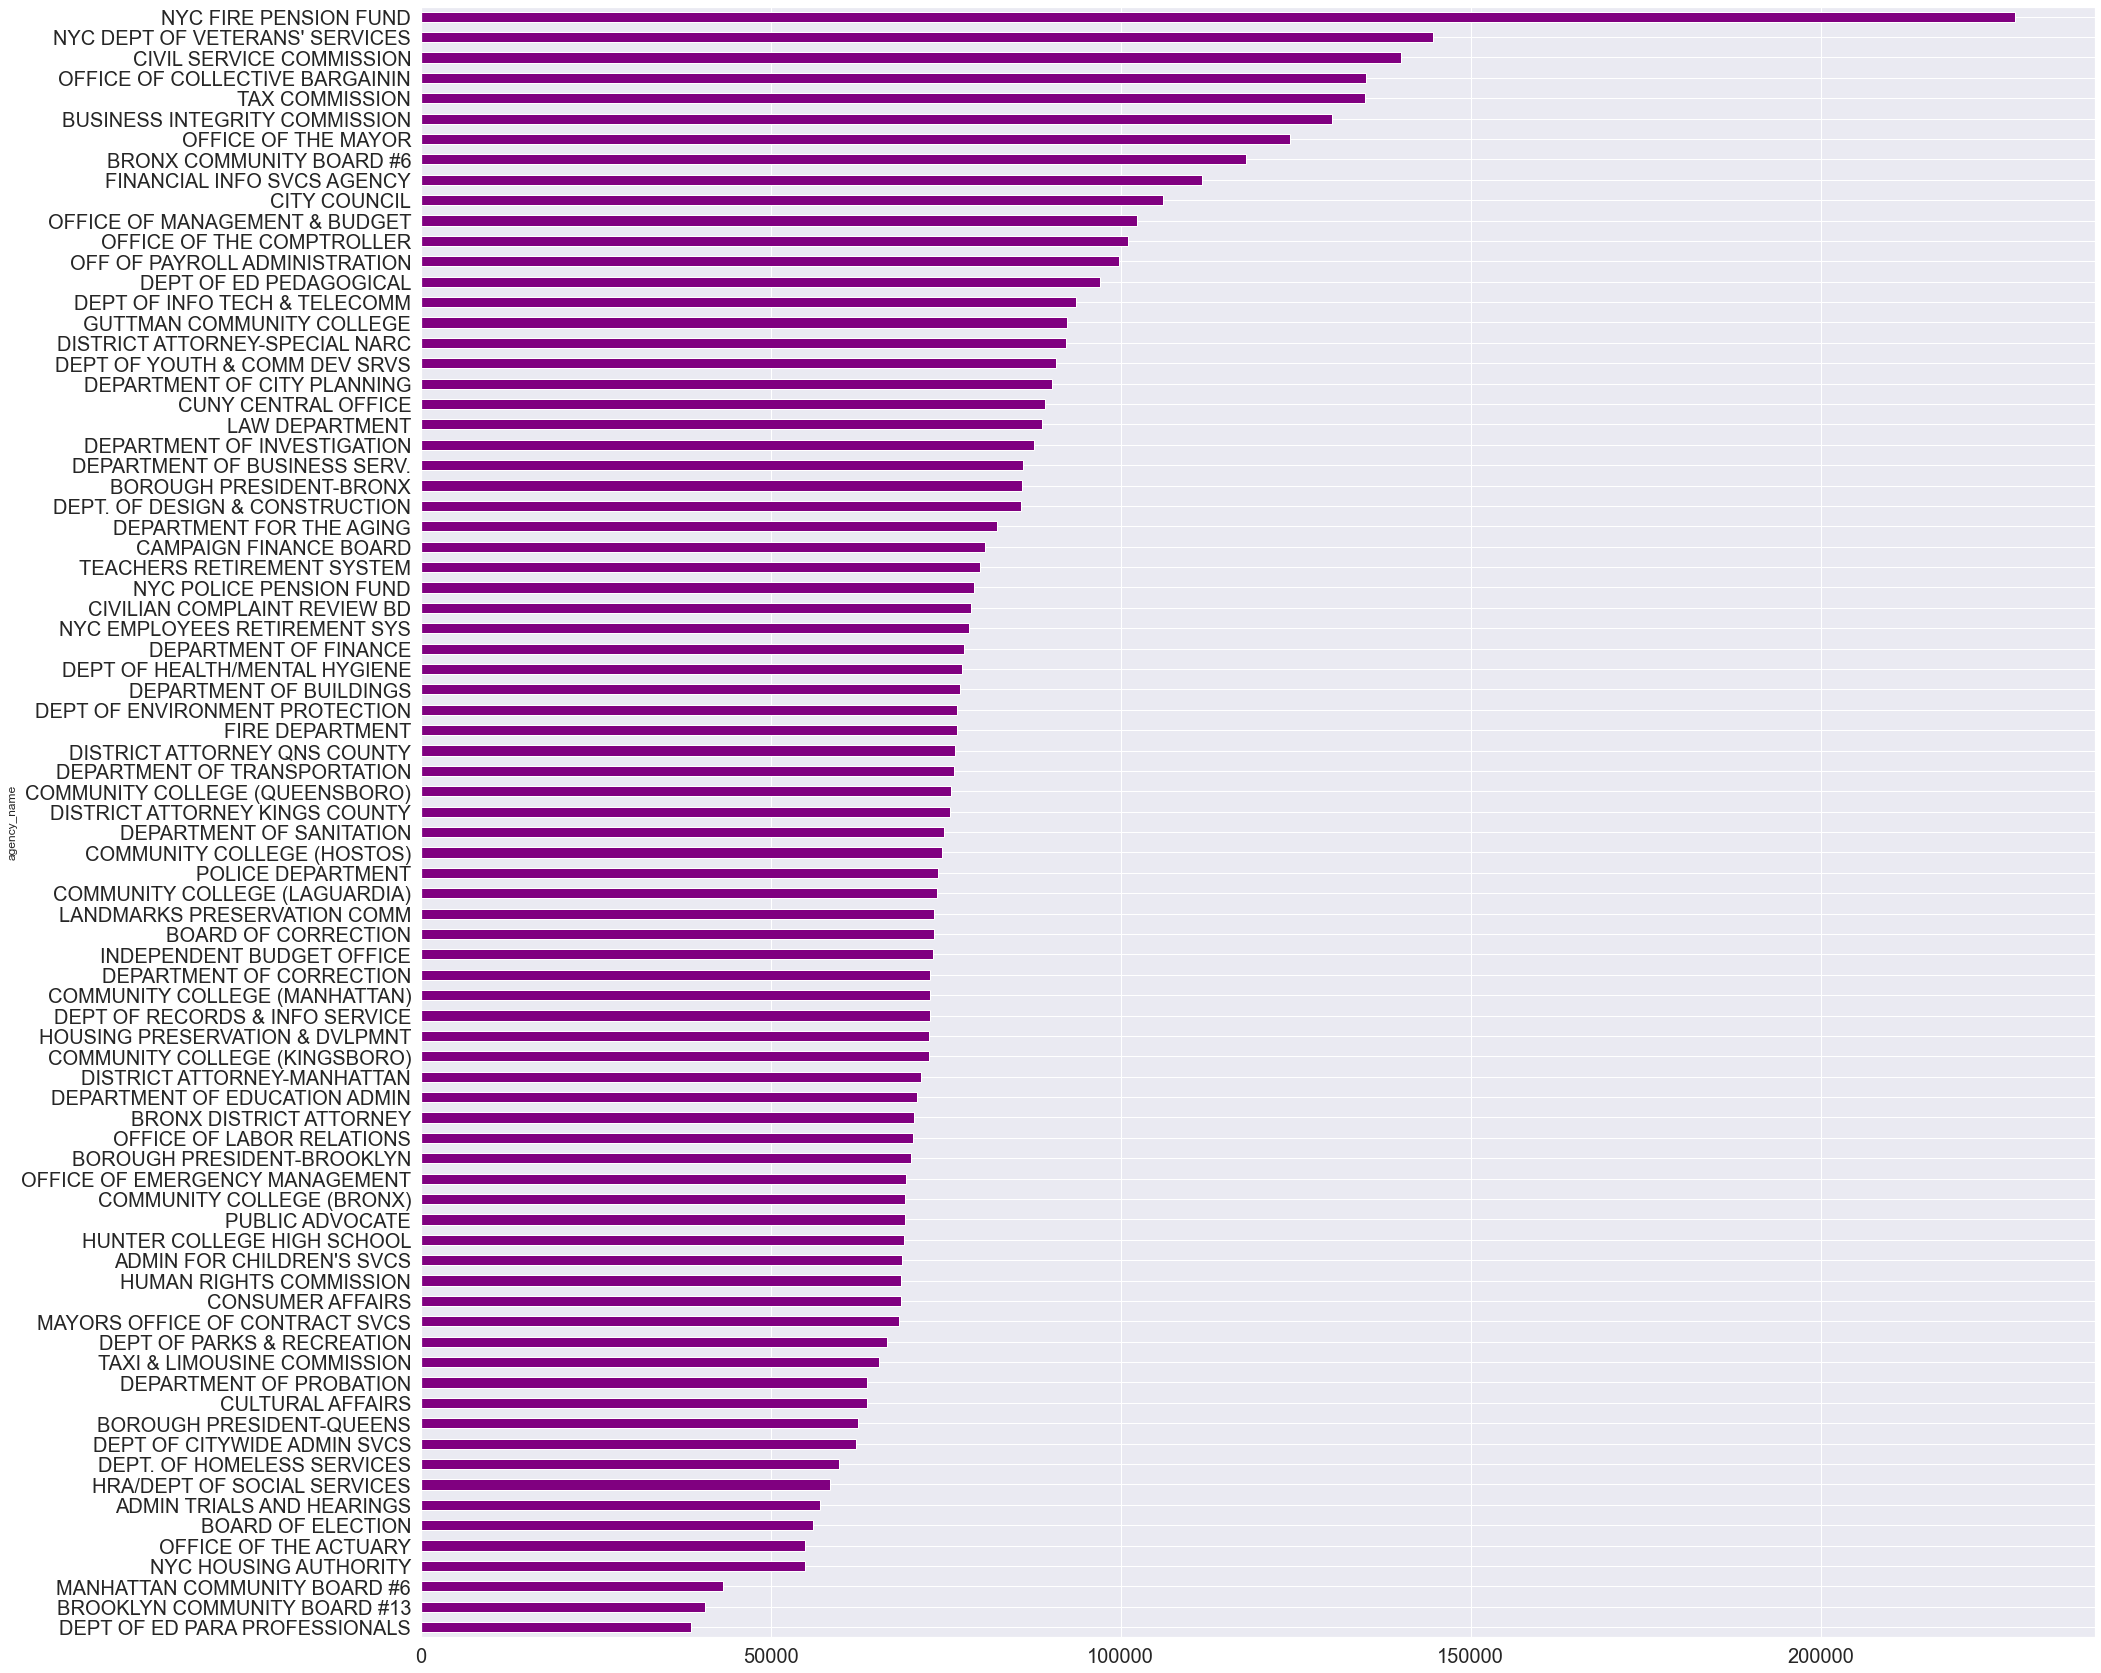

In [30]:
#Make a plot visualizing the difference average base salaries based on agency_name. Who would you want to work for based on this information? 
gb = df.groupby('agency_name')
avg_sal = gb['base_salary'].mean()
sort = avg_sal.sort_values()
sort.plot(kind = 'barh', figsize = (30,30), fontsize = 20, color = 'purple')

In [31]:
print('I would like to work for NYC Fire Pension Fund by looking at their average salary')

I would like to work for NYC Fire Pension Fund by looking at their average salary


# Using the BX-Police.csv data:
* create a time series chart illustrating their average base salary over time (by fiscal_year).  
* What trend does this show? 
* Why do you think the trend exists?


In [50]:
df2 = pd.read_csv('data/BX-Police.csv')
df2.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
0,2019,56.0,POLICE DEPARTMENT,GUZMAN,ALBERTO,NaN,07/05/2017,BRONX,POLICE OFFICER,ACTIVE,45000.0,per Annum,2040.00,43541.17,243.83,8597.10,3710.14
1,2015,NaN,POLICE DEPARTMENT,DERASMO,MARIELENA,NaN,07/06/2010,BRONX,POLICE OFFICER,ACTIVE,56609.0,per Annum,2085.72,54578.49,335.83,13344.33,4387.03
2,2018,56.0,POLICE DEPARTMENT,GARCES,MICHAEL,A,01/09/2013,BRONX,POLICE OFFICER,ACTIVE,63125.0,per Annum,2045.72,62809.14,145.00,7349.27,9801.34
3,2017,NaN,POLICE DEPARTMENT,ROSSI,THOMAS,C,01/06/2016,BRONX,POLICE OFFICER,ACTIVE,46805.0,per Annum,2051.43,49411.14,121.00,4213.27,6490.72
4,2019,56.0,POLICE DEPARTMENT,GARRETT,DENISE,NaN,05/30/2001,BRONX,SCHOOL SAFETY AGENT,ACTIVE,46737.0,per Annum,2040.00,46608.91,0.00,0.00,1202.56


In [51]:
dup = df2.duplicated().sum()
print(f'There are {dup} duplicate values in our dataframe')

There are 0 duplicate values in our dataframe


In [52]:
null_val = df2.isnull().sum()
print(null_val)

fiscal_year                      0
payroll_number                1059
agency_name                      0
last_name                        7
first_name                       7
mid_init                       821
agency_start_date                0
work_location_borough            0
title_description                0
leave_status_as_of_june_30       0
base_salary                      0
pay_basis                        0
regular_hours                    0
regular_gross_paid               0
ot_hours                         0
total_ot_paid                    0
total_other_pay                  0
dtype: int64


In [53]:
print(df2.shape)

(2574, 17)


In [54]:
# * Remove any row that has a null value in it. 
df2 = df2.dropna() 
print(df2.shape)

(1039, 17)


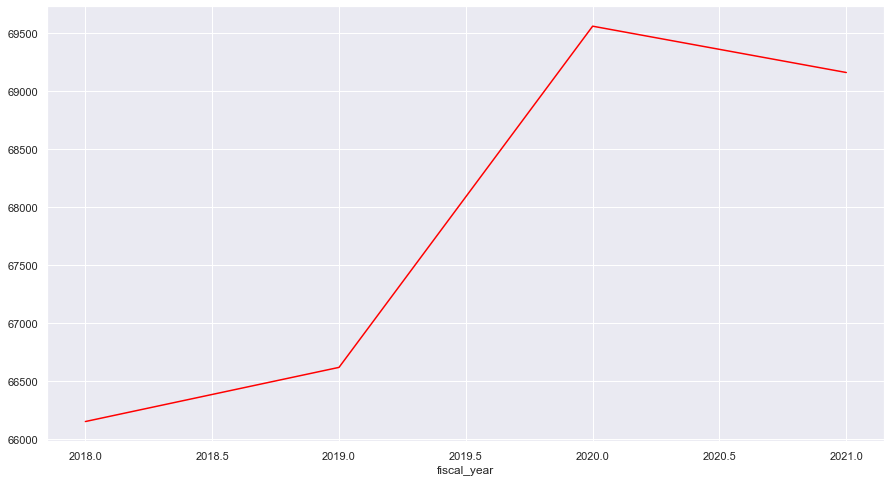

In [56]:
#create a time series chart illustrating their average base salary over time (by fiscal_year).
gb1 = df2.groupby('fiscal_year') 
avg = gb1['base_salary'].mean()
avg.plot(kind = 'line', figsize = (15,8), color = 'red')


In [59]:
#What trend does this show?
print('The average base salary seems increasing slowly, but then from the year of 2019 to 2020, the average'+
     'salary seems exponencially increasing, then from 2020 to 2021, it seems decreasing slowly')
print()
#Why do you think the trend exists?
print('The trend probably has to do something with national economy')


The average base salary seems increasing slowly, but then from the year of 2019 to 2020, the averagesalary seems exponencially increasing, then from 2020 to 2021, it seems decreasing slowly

The trend probably has to do something with national economy


# Using Stocks.csv
* Tell me a story about the Google stock for the year. 
* Any story you'd like to tell. 


In [75]:
df3 = pd.read_csv('data/Stocks.csv')
df3.head()

,Date,Volume,High,Low,Open,Close,Adj Close,Ticker
0,2021-01-04,1901900,1760.650024,1707.849976,1757.540039,1728.239990,1728.239990,GOOG
1,2021-01-05,1145300,1747.670044,1718.015015,1725.000000,1740.920044,1740.920044,GOOG
2,2021-01-06,2602100,1748.000000,1699.000000,1702.630005,1735.290039,1735.290039,GOOG
3,2021-01-07,2265000,1788.400024,1737.050049,1740.060059,1787.250000,1787.250000,GOOG
4,2021-01-08,2050600,1809.839966,1773.535034,1787.979980,1807.209961,1807.209961,GOOG


In [76]:
dup = df3.duplicated().sum()
print(f'There are {dup} duplicate values in our dataframe')

There are 0 duplicate values in our dataframe


In [78]:
null_val = df3.isnull().sum()
print(null_val)


Date         0
Volume       0
High         0
Low          0
Open         0
Close        0
Adj Close    0
Ticker       0
dtype: int64


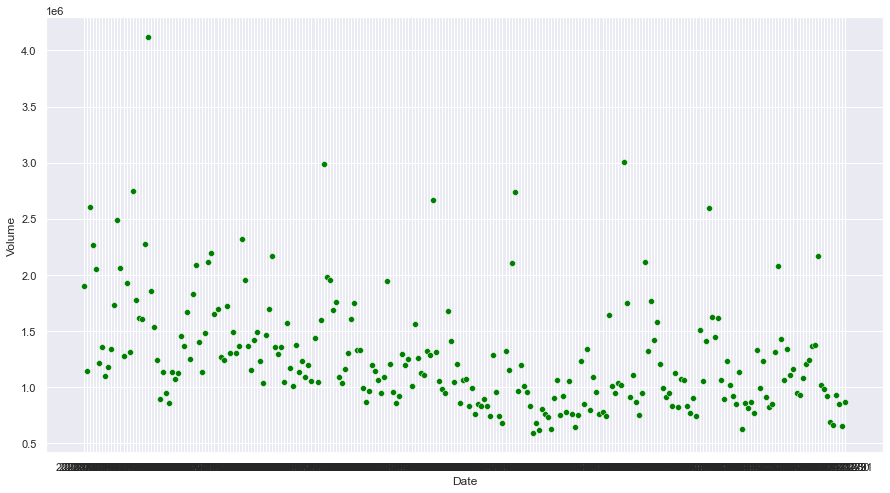

In [92]:
plt.figure(figsize=(15, 8))
volume_data = sns.scatterplot(data = df3, x='Date', y='Volume', color = 'green')

In [93]:
print('The volume of the data seems preety consistent')

The volume of the data seems preety consistent


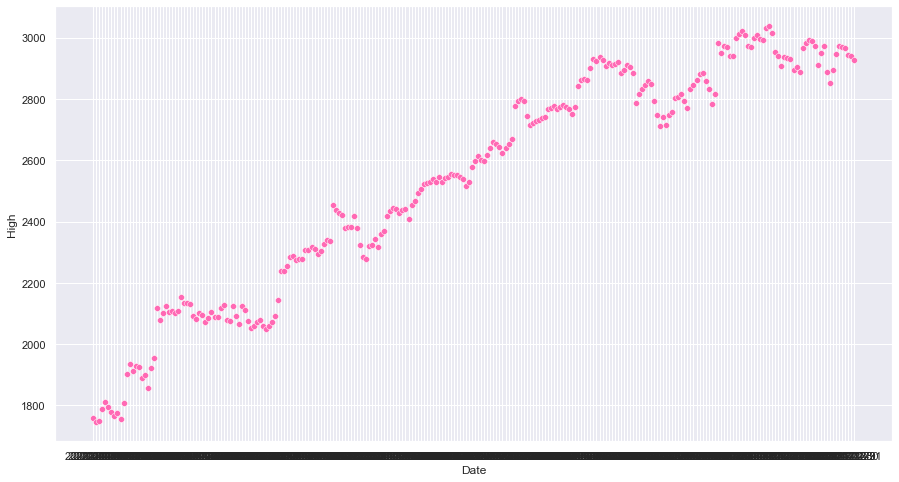

In [91]:
plt.figure(figsize=(15, 8))
high_ax = sns.scatterplot(data = df3, x='Date', y='High', color = 'hotpink')


In [94]:
print('The High column forms a linear line and its increasing except for some part where it went down a little')

The High column forms a linear line and its increasing except for some part where it went down a little


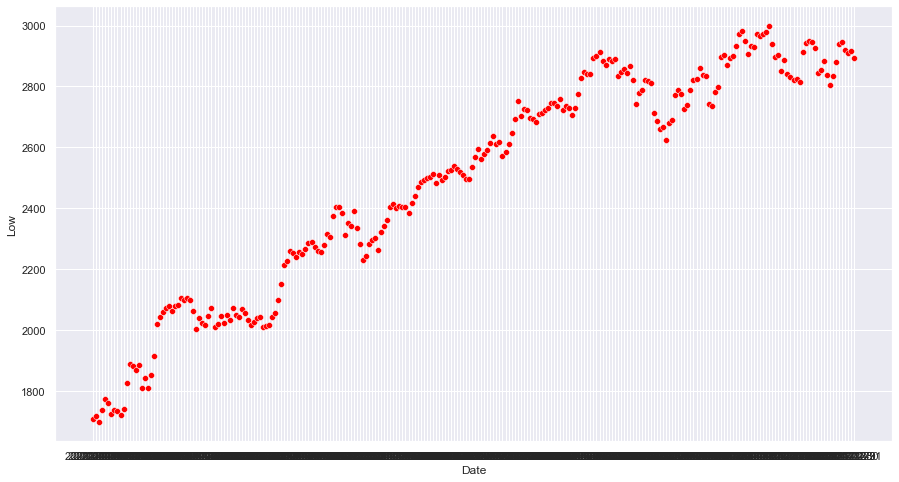

In [95]:
plt.figure(figsize=(15, 8))
low_ax = sns.scatterplot(data = df3, x='Date', y='Low', color = 'red')

In [96]:
print('The High and the Low follows almost the same pattern in Google stock this year')

The High and the Low follows almost the same pattern in Google stock this year


# Using Sales.csv 
* make a time series chart that shows the sales for each item over the past 12 months.  
* What does this tell you about the items.  
* Which item would you recommend they push more of and which item/s would you recommend they stop selling?
* show what percentage of each item contributes to total sales. 


In [8]:
df4 = pd.read_csv('data/Sales.csv')
df4.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer
0,1,2500,1500,5200,9200,1200,1500
1,2,2630,1200,5100,6100,2100,1200
2,3,2140,1340,4550,9550,3550,1340
3,4,3400,1130,5870,8870,1870,1130
4,5,3600,1740,4560,7760,1560,1740


In [9]:
dup = df4.duplicated().sum()
print(f'There are {dup} duplicate values in our dataframe')

There are 0 duplicate values in our dataframe


In [10]:
null_val = df4.isnull().sum()
print(null_val)

month_number    0
facecream       0
facewash        0
toothpaste      0
bathingsoap     0
shampoo         0
moisturizer     0
dtype: int64


In [11]:
df4.shape

(12, 7)

In [12]:

print(df4.columns)

Index(['month_number', 'facecream', 'facewash', 'toothpaste', 'bathingsoap',
       'shampoo', 'moisturizer'],
      dtype='object')


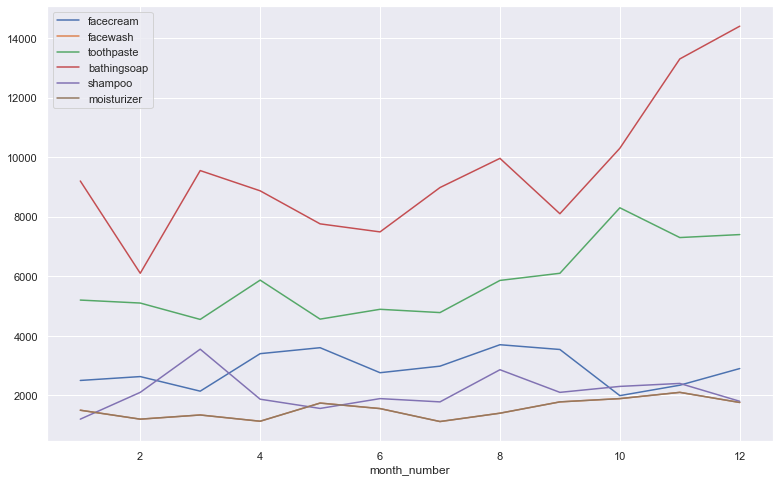

In [34]:
#make a time series chart that shows the sales for each item over the past 12 months.

col_names = ['facecream', 'facewash', 'toothpaste', 'bathingsoap',
       'shampoo', 'moisturizer']

df4.plot(kind = 'line', figsize = (13,8),x ='month_number', y = col_names)




In [35]:
#What does this tell you about the items.
print('HIGHEST Sale: BathingSoap has the highest sale rate especially towards the end of the year')
print('LOWEST: Moisturizer has the lowest Sales rate')
print()
print('-------------------------GENERAL DESCRIPTION-----------------------')
print('Facecream: Facecream sales droped a lot as winter is approaching.')
print('Facewash: Facewash sales are higher during the summer season')
print('ToothPaste: Toothpaste sales are higher towards the end of the year, not sure why.')
print('Shampoo: The sale is higher towards the begining of the year')



HIGHEST Sale: BathingSoap has the highest sale rate especially towards the end of the year
LOWEST: Moisturizer has the lowest Sales rate

-------------------------GENERAL DESCRIPTION-----------------------
Facecream: Facecream sales droped a lot as winter is approaching.
Facewash: Facewash sales are higher during the summer season
ToothPaste: Toothpaste sales are higher towards the end of the year, not sure why.
Shampoo: The sale is higher towards the begining of the year


In [36]:
#Which item would you recommend they push more of and which item/s would you recommend they stop selling?
print('I recommend they push more of bathing soap and STOP selling moisturizer')


I recommend they push more of bathing soap and STOP selling moisturizer


In [53]:
#show what percentage of each item contributes to total sales.
sale_perc = df4[col_names].sum().sum() 

products = df4[col_names].sum()

total = products/sale_perc*100
total

facecream      12.277453
facewash        6.592722
toothpaste     24.893178
bathingsoap    40.596069
shampoo         9.047856
moisturizer     6.592722
dtype: float64